# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

### Solution: Students should load and process the data. Consult the solution code for Lab 3.3 for a good example (also below).

In [15]:
% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model

In [16]:
# Students should load and process the data. Consult the solution code for Lab 3.3 for a good example.

# Eventually students will arrive at a cleaned data set. Here we're importing the processed data from Lab 3.4. 
sales = pd.read_csv("../../../../../curriculum/04-lessons/week-03/3.4-lab/assets/datasets/sales.csv")
sales.dropna(inplace=True)
del sales["Unnamed: 0"]
# Convert dates
sales["First Date"] = pd.to_datetime(sales["First Date"], format="%Y-%m-%d")
sales["Last Date"] = pd.to_datetime(sales["Last Date"], format="%Y-%m-%d")

sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,First Date,Last Date
0,2106,CEDAR FALLS,1434021.94,281.070549,7,18.846731,50613,93982.72,18.420760,93.802281,337166.53,337804.05,2015-01-08,2016-03-31
1,2113,GOWRIE,85763.42,63.015004,94,17.625704,50543,6500.83,4.776510,21.082425,22351.86,21736.63,2015-01-07,2016-03-30
2,2130,WATERLOO,1108184.99,280.624206,7,17.506599,50703,65562.88,16.602401,93.612494,277764.46,306942.27,2015-01-08,2016-03-31
3,2152,ROCKWELL,72080.36,50.230216,17,13.043590,50469,6164.92,4.296111,16.824704,16805.11,9307.75,2015-01-08,2016-02-25
4,2178,WAUKON,277987.96,104.389020,3,16.594438,52172,21719.49,8.156023,35.011457,54411.42,58939.90,2015-01-07,2016-03-30


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

### Solution: Look for one or more plots that are targeted at the scenario. For example:
* Scenario 1: "Sales 2015 Q1" vs "Sales 2015", See solution code for Lab 3.4
* Scenario 2: Some kind of plot showing a relationship between total sales and one of the location variables, see below.

An excellent visual might plot a [color map](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) of e.g. 2015 Total sales on Iowa countries.


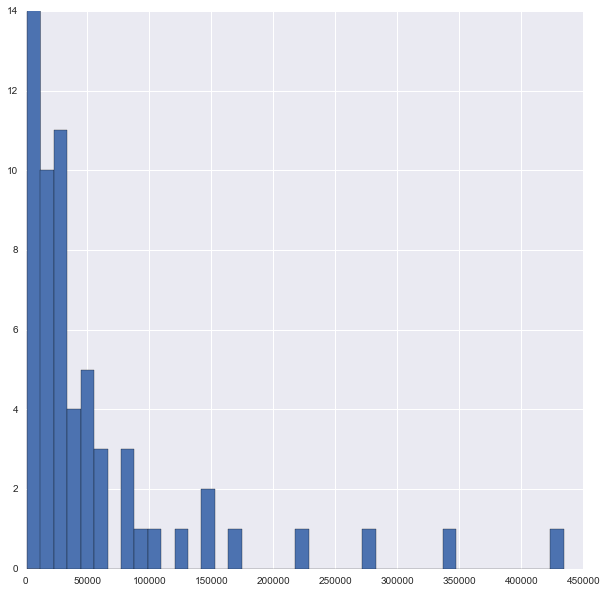

In [28]:
# Single County
data = sales[sales["County Number"] == 7]["2015 Sales Q1"]
plt.hist(data, bins=40)
plt.show()

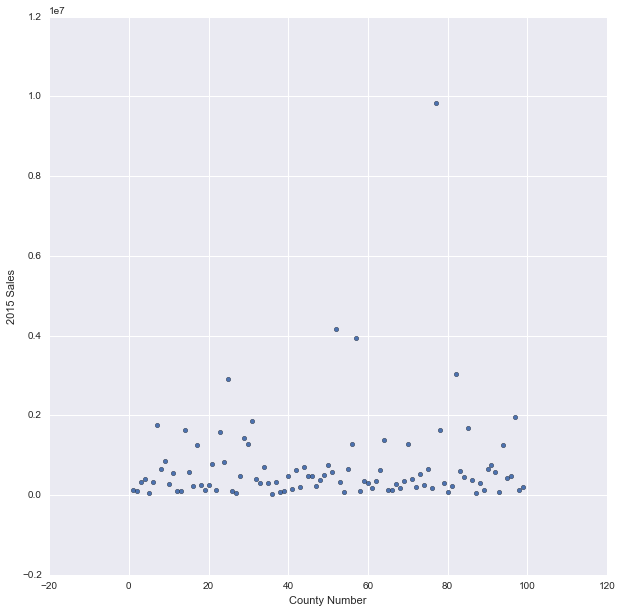

In [35]:
# Max per county, could do medians or violin plots, or many variations
df = sales.groupby(by=["County Number"], as_index=False)
df = df.agg({"2015 Sales": np.max})
df.head()

df.plot.scatter(x="County Number", y="2015 Sales")

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

### Solution: Most of this will be above or from the Lab 3.3/3.4 notebooks and will vary a lot based on students' models.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

### Solution: Look for an interesting/relevant correlation or statistic

For scenario 1 there are a number of good correlations. For scenario 2, a comparison of the location parameters' distributions of e.g. sales would be appropriate.

In [ ]:
# There are a number of good correlations
sales[[u'2015 Sales', u'2015 Sales mean',u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean', u'2015 Sales Q1', u'2016 Sales Q1']].corr()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [6]:
from sklearn import linear_model
...

### Solution: Look for at least one relevant model and a measure of goodness of fit.
* Scenario 1: See the fit in Lab 3.4 for an example
* Scenario 2: Students should include at least one model that includes at least one location parameter, or a series of models e.g. for each zip code or county, etc. Scenario 2 asks for a table, a good visual is of course a welcome alternative.

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

### Solution: The plot in Lab 3.4 is a good example -- something that shows the data and the model, or the true values versus the predictions.

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### Solution:

Students can show some real understanding here. In scenario 1, if students filtered out the stores that opened or closed in 2015, a great write-up would explain how to account for that in their model/predictions. For example, they could normalize by the number of days open and use their model to account for those stores. Or they could look at the proportion of sales from closed stores and try to adjust their prediction.

For scenario 2, a great writeup might make predictions based on 2015 Sales for good 2016 Sales locations, or alternatively discuss the variation in models by location.

In both scenarios look for good presentation language and attention to the audience and stakeholders involved. Students should have had a lot of time to address this in Lesson 5.2, so look for that here.

Bonus points for using any of the week's more advanced topics, for example:
* Scenario 1: Outliers
* Scenario 2: Regularization
* Both: Bias-Variance